In [1]:
import os
import gc
import shutil
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams['figure.dpi'] = 150

from Definitions_TOY import T, DATA_PATH, FIGURES_PATH, RANDOM_SEED

np.random.seed(RANDOM_SEED)

<font size=7><b>CPSC471 Project: Generate Data (TOY)</b></font>

**Ruomu (Felix) Zou**

Generates a TOY dataset to examine DD with.

# `DataTOY`: A Simple 3-Class Classification Task on Elipsoids.

Two inner elipsoids and an outer ring.

## Generate and save:

In [2]:
# configurations
INNER1_NUM_DATAPOINTS = 300
INNER1_X = -1
INNER1_Y = -1.5
INNER1_X_STD = 0.6
INNER1_Y_STD = 0.6

INNER2_NUM_DATAPOINTS = 300
INNER2_X = 1
INNER2_Y = 1.1
INNER2_X_STD = 0.8
INNER2_Y_STD = 0.7

OUTER_NUM_DATAPOINTS = 600
OUTER_NOISE = 0.4
OUTER_X_INTERCEPTS = 4
OUTER_Y_INTERCEPTS = 4

# generate inner 1
x_inner1 = np.random.normal(loc=INNER1_X, scale=INNER1_X_STD, size=(INNER1_NUM_DATAPOINTS))
y_inner1 = np.random.normal(loc=INNER1_Y, scale=INNER1_Y_STD, size=(INNER1_NUM_DATAPOINTS))
labels_inner1 = np.zeros_like(y_inner1)
data_inner1 = np.column_stack((x_inner1, y_inner1, labels_inner1))

# generate inner 2
x_inner2 = np.random.normal(loc=INNER2_X, scale=INNER2_X_STD, size=(INNER2_NUM_DATAPOINTS))
y_inner2 = np.random.normal(loc=INNER2_Y, scale=INNER2_Y_STD, size=(INNER2_NUM_DATAPOINTS))
labels_inner2 = np.ones_like(y_inner2)
data_inner2 = np.column_stack((x_inner2, y_inner2, labels_inner2))

# generate top half of outer ring
x_outertop = np.linspace(start=-OUTER_X_INTERCEPTS, stop=OUTER_X_INTERCEPTS, num=OUTER_NUM_DATAPOINTS//2)
noise_outertop = np.random.normal(loc=0, scale=OUTER_NOISE, size=(OUTER_NUM_DATAPOINTS//2))
y_outertop = np.sqrt((1-(x_outertop**2)/(OUTER_X_INTERCEPTS**2)) * (OUTER_Y_INTERCEPTS**2)) + noise_outertop
labels_outertop = np.full_like(y_outertop, fill_value=2)
data_outertop = np.column_stack((x_outertop, y_outertop, labels_outertop))

# generate bottom half of outer ring
x_outerbottom = np.linspace(start=-OUTER_X_INTERCEPTS, stop=OUTER_X_INTERCEPTS, num=OUTER_NUM_DATAPOINTS//2)
noise_outerbottom = np.random.normal(loc=0, scale=OUTER_NOISE, size=(OUTER_NUM_DATAPOINTS//2))
y_outerbottom = -np.sqrt((1-(x_outerbottom**2)/(OUTER_X_INTERCEPTS**2)) * (OUTER_Y_INTERCEPTS**2)) + noise_outerbottom
labels_outerbottom = np.full_like(y_outerbottom, fill_value=2)
data_outerbottom = np.column_stack((x_outerbottom, y_outerbottom, labels_outerbottom))

# combine into dataset
data_all = np.row_stack((data_inner1, data_inner2, data_outertop, data_outerbottom))
DataTOY = pd.DataFrame(data=data_all, columns=["x0","x1","label"])

# save dataset as csv
DataTOY.to_csv(os.path.join(DATA_PATH, "DataTOY.csv"))

## Plot and save figure:

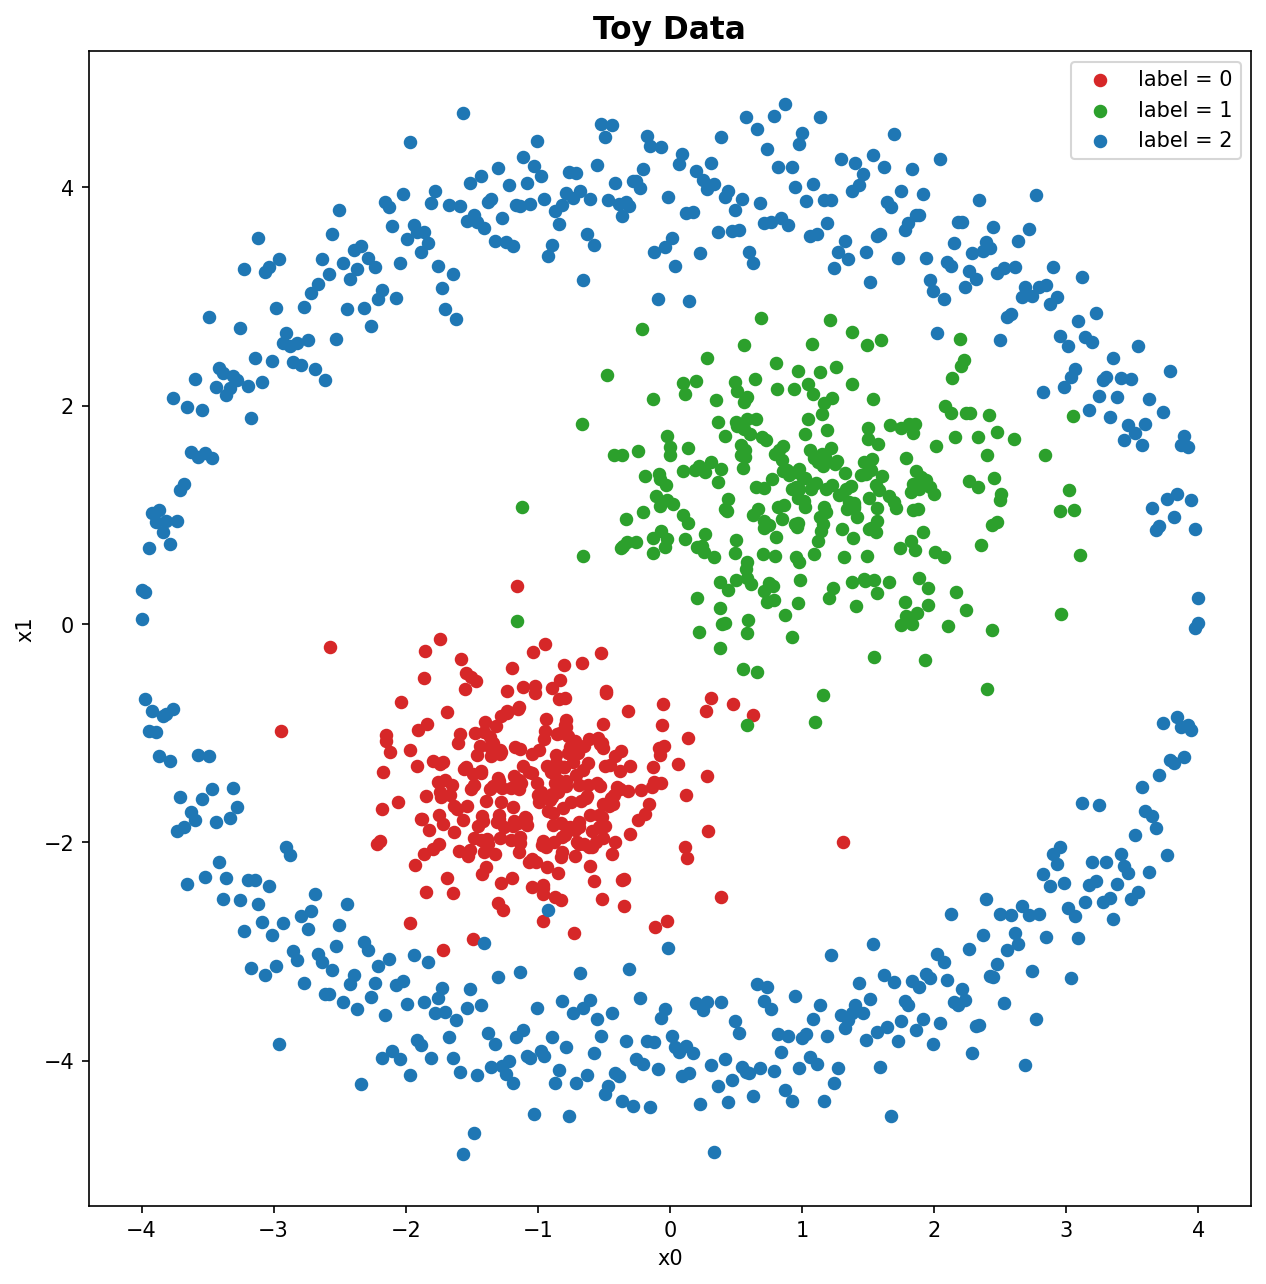

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
zeros_mask = DataTOY.label==0
ones_mask = DataTOY.label==1
twos_mask = DataTOY.label==2
ax.scatter(DataTOY[zeros_mask].x0, DataTOY[zeros_mask].x1, c="tab:red", label="label = 0", s=30)
ax.scatter(DataTOY[ones_mask].x0, DataTOY[ones_mask].x1, c="tab:green", label="label = 1", s=30)
ax.scatter(DataTOY[twos_mask].x0, DataTOY[twos_mask].x1, c="tab:blue", label="label = 2", s=30)
ax.set_title("Toy Data", fontsize=15, fontweight="bold")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.legend(loc="upper right")
plt.savefig(os.path.join(FIGURES_PATH, "DataTOY.png"))
plt.show()